In [2]:
## Retail dataset EDA -- Validation ##

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     

In [3]:
# Load the dataset

df = pd.read_csv('C:\\Users\\Doug\\Documents\\2026_DATA_ENGINEER\\synthetic-datasets\\datasets\\retail\\synthetic_retail_20250901.csv')        

In [4]:
# Schema check
df.dtypes


transaction_id                    str
customer_id                       str
product_category                  str
product_type                      str
store_location                    str
quantity                        int64
unit_price                    float64
total_value                   float64
customer_age                    int64
customer_income               float64
loyalty_score                 float64
days_since_last_purchase        int64
purchase_frequency_monthly    float64
average_order_value           float64
discount_percentage           float64
payment_method                    str
sales_channel                     str
season                            str
transaction_date                  str
customer_registration_date        str
customer_segment                int64
predicted_clv                 float64
dtype: object

In [5]:
# Schema check
df.shape

(800000, 22)

In [6]:
# Schema check
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   transaction_id              800000 non-null  str    
 1   customer_id                 800000 non-null  str    
 2   product_category            800000 non-null  str    
 3   product_type                800000 non-null  str    
 4   store_location              798800 non-null  str    
 5   quantity                    800000 non-null  int64  
 6   unit_price                  800000 non-null  float64
 7   total_value                 800000 non-null  float64
 8   customer_age                800000 non-null  int64  
 9   customer_income             793297 non-null  float64
 10  loyalty_score               792741 non-null  float64
 11  days_since_last_purchase    800000 non-null  int64  
 12  purchase_frequency_monthly  794051 non-null  float64
 13  average_order_value      

In [69]:
# Schema check
with pd.option_context('display.max_columns', None):
    display(df.head())

,transaction_id,customer_id,product_category,product_type,store_location,quantity,unit_price,total_value,customer_age,customer_income,loyalty_score,days_since_last_purchase,purchase_frequency_monthly,average_order_value,discount_percentage,payment_method,sales_channel,season,transaction_date,customer_registration_date,customer_segment,predicted_clv
0,R00000001,C005034,Clothing,Women's Wear,Strip Mall,1,5.000000,5.000000,44,47429.048126,25.346999,13,4.0,38.115832,0.117860,Credit Card,In-Store,Winter,2023-08-14,2021-11-11,0,115.969568
1,R00000002,C001519,Sports,Fitness,Outlet,3,25.396857,76.190572,53,69022.451486,33.364044,11,6.0,78.300724,0.134948,Debit Card,Phone,Winter,2023-12-21,2022-12-25,0,55.446670
2,R00000003,C037901,Clothing,Men's Wear,Downtown,4,18.017375,72.069500,46,42166.625211,36.390014,30,4.0,20.000000,0.066752,Mobile Payment,In-Store,Spring,2023-11-09,2022-11-05,1,583.111294
3,R00000004,C018713,Beauty,Makeup,Outlet,2,9.469899,18.939799,40,29925.239439,22.462951,26,4.0,20.000000,0.360916,Debit Card,In-Store,Fall,2022-09-01,2021-11-11,0,164.140465
4,R00000005,C008625,Sports,Team Sports,Downtown,2,14.127363,28.254727,19,NaN,44.118146,35,133.0,35.514423,0.251292,Credit Card,In-Store,Fall,2022-01-08,2021-08-29,0,123.554744


In [107]:
## DATA QUALITY COMMENT LOG
# 1. Fixed transaction_date and customer_registration_date to datetime dtype for proper analysis.
# 2. Checked for duplicates and found none.
# 3. Checked for data ranges for potential outliers and found none for transaction_date, customer_registration_date
# 4. Checked for unique customers potential & transaction count outliers and found that there are 40,000 unique customers, with a range of transactions per customer from 3 to 41.
# 5. Checked for % of missing valies in each column and found that there are some for store_location, customer_income, loyalty_score, purchase_frequency_monthly, and payment_method. The % of each doesn't go over 1%.
# 6. Checked for negative of zero unit_price, total_value, or average_order_value and found none.
# 7. Checked for suspicious values -- purchase_frequency_monthly outliers (e.g. > 50), discount_rate outliers (e.g. > 0.5 or < 0), total_value outliers (e.g. > $5,000)
    # 7.1 Checked for purchase_frequency_monthly = 150 for count of returns
    # 7.2 Checked for describing total_value and the threshold for the top 1% outliers in total_value

In [9]:
# 1. Fixing date dtypes
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['customer_registration_date'] = pd.to_datetime(df['customer_registration_date'])

In [56]:
# 2. Generic check for nulls and duplicates
print(f"Null values per column:\n{df.isnull().sum()}\n")
print(f"Duplicate rows: {df.duplicated().sum()}")

Null values per column:
transaction_id                   0
customer_id                      0
product_category                 0
product_type                     0
store_location                1200
quantity                         0
unit_price                       0
total_value                      0
customer_age                     0
customer_income               6703
loyalty_score                 7259
days_since_last_purchase         0
purchase_frequency_monthly    5949
average_order_value              0
discount_percentage              0
payment_method                1179
sales_channel                    0
season                           0
transaction_date                 0
customer_registration_date       0
customer_segment                 0
predicted_clv                    0
dtype: int64

Duplicate rows: 0


In [14]:
# 3. Check date ranges
print(f"Transaction date range: {df['transaction_date'].min()} -> {df['transaction_date'].max()}")
print(f"Customer registration date range: {df['customer_registration_date'].min()} -> {df['customer_registration_date'].max()}")

Transaction date range: 2022-01-01 00:00:00 -> 2023-12-31 00:00:00
Customer registration date range: 2019-01-03 00:00:00 -> 2023-12-01 00:00:00


In [60]:
# 4. Check for unique customers potential & transaction count outliers
unique_customers = df['customer_id'].nunique()
print(f"Unique customers: {unique_customers}\n")

transactions_per_customer = df['customer_id'].value_counts()
print(f"Transactions per customer (sample):\n{transactions_per_customer.sample(10)}\n")
print(f"Min transactions per customer: {transactions_per_customer.min()}")
print(f"Max transactions per customer: {transactions_per_customer.max()}")

Unique customers: 40000

Transactions per customer (sample):
customer_id
C018401    20
C001628    17
C023457    26
C019931    23
C026161    14
C039835    19
C025638    21
C038398    25
C031843    14
C005175    13
Name: count, dtype: int64

Min transactions per customer: 3
Max transactions per customer: 41


In [65]:
# 5. Check for the % of missing values in each column and decide if we need to impute or drop any columns

missing = pd.DataFrame({
    'total_rows': df.count(),
    'count_missing_rows': df.isnull().sum(),
    'pct_missing_rows': (df.isnull().sum() / len(df) * 100).round(2)
}).query('count_missing_rows > 0')
print(missing)

                            total_rows  count_missing_rows  pct_missing_rows
store_location                  798800                1200              0.15
customer_income                 793297                6703              0.84
loyalty_score                   792741                7259              0.91
purchase_frequency_monthly      794051                5949              0.74
payment_method                  798821                1179              0.15


In [72]:
# 6. Check for negative or zero unit price, total value, or average order value

print(f"Negative or zero unit price: {(df['unit_price'] <= 0).sum()}")
print(f"Negative or zero total value: {(df['total_value'] <= 0).sum()}")
print(f"Negative or zero average order value: {(df['average_order_value'] <= 0).sum()}")

Negative or zero unit price: 0
Negative or zero total value: 0
Negative or zero average order value: 0


In [106]:
# 7 Check for suspicious values --
    # Purchase frequency outliers (e.g. > 50)
    # discount_rate outliers (e.g. > 0.5 or < 0)
    # total_value outliers (e.g. > $5,000)

print(f"purchase_frequency_monthly > 50: {(df['purchase_frequency_monthly'] > 50).sum()}")
print(f"discount_percentage > 0.5: {(df['discount_percentage'] > 0.5).sum()}")
print(f"discount_percentage < 0: {(df['discount_percentage'] < 0).sum()}")
print(f"total_value > 5000: {(df['total_value'] > 5000).sum()}")

purchase_frequency_monthly > 50: 79437
discount_percentage > 0.5: 0
discount_percentage < 0: 0
total_value > 5000: 6


In [97]:
# 7.1 a value of 50 purchase_frequency_monthly still gets returned quite often, so let's adjust:

purchase_frequency = df['purchase_frequency_monthly']
print(f"descriptives of purchase_frequency_monthly:\n{purchase_frequency.describe()} \n")
print(f"percentage over count of purchase_frequency_monthly > 150: {(purchase_frequency > 150).sum() / len(purchase_frequency) * 100:.2f}%")

## Seems that 150 is a reasonable threshold for outliers in purchase_frequency_monthly.

descriptives of purchase_frequency_monthly:
count    794051.000000
mean         15.287693
std          39.096429
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         199.000000
Name: purchase_frequency_monthly, dtype: float64 

percentage over count of purchase_frequency_monthly > 150: 3.27%


In [105]:
# 7.2 Total value describe and check the threshold for top 1% outliers in total_value

print(f"descriptives of total_value:\n{df['total_value'].describe()} \n")

def find_pct_outliers_threshold(df, column, pct):
    percentile = 1 - (pct / 100)
    return df[column].quantile(percentile)

print(f"total_value threshold for top 1% outliers: {find_pct_outliers_threshold(df, 'total_value', 1)}")

descriptives of total_value:
count    800000.000000
mean         66.314962
std         118.879139
min           5.000000
25%          15.000000
50%          30.030549
75%          68.273101
max        8000.000000
Name: total_value, dtype: float64 

total_value threshold for top 1% outliers: 562.0868956639116


In [ ]:
## 1 - REVENUE ANALYSIS ##

In [118]:
## Product category analysis
# product_category by total revenue, average order value, transaction count, and revenue share percentage

revenue_by_cat = (
    df.groupby('product_category')['total_value']
    .agg(total_revenue='sum', avg_order='mean', transaction_count='count')
    .sort_values('total_revenue', ascending=False)
)
print(revenue_by_cat)

with pd.option_context('display.max_columns', None):
    display(revenue_by_cat.head())

                  total_revenue   avg_order  transaction_count
product_category                                              
Electronics        3.197497e+07  160.351078             199406
Home & Garden      6.580488e+06   54.962436             119727
Sports             5.433545e+06   45.160620             120316
Clothing           5.004956e+06   31.330317             159748
Beauty             2.264047e+06   23.457494              96517
Books              1.002874e+06   15.615747              64222
Toys               7.910931e+05   19.745733              40064


,total_revenue,avg_order,transaction_count
product_category,,,
Electronics,3.197497e+07,160.351078,199406
Home & Garden,6.580488e+06,54.962436,119727
Sports,5.433545e+06,45.160620,120316
Clothing,5.004956e+06,31.330317,159748
Beauty,2.264047e+06,23.457494,96517


In [134]:
## Product category analysis to determine business model indicators
# product_category by total revenue, average order value and transaction count

bm_analysis = df.groupby('product_category')['total_value'].agg(['count', 'sum'])
bm_analysis = bm_analysis.sort_values(by='sum', ascending=False)
print(bm_analysis)

                   count           sum
product_category                      
Electronics       199406  3.197497e+07
Home & Garden     119727  6.580488e+06
Sports            120316  5.433545e+06
Clothing          159748  5.004956e+06
Beauty             96517  2.264047e+06
Books              64222  1.002874e+06
Toys               40064  7.910931e+05


In [136]:
bm_analysis = (
    df.groupby('product_category')['total_value']
    .agg(['count', 'sum'])
    .assign(
        transaction_pct = lambda x: (x['count'] / x['count'].sum()) * 100,
        revenue_pct = lambda x: (x['sum'] / x['sum'].sum()) * 100,
        efficiency_ratio = lambda x: x['revenue_pct'] / x['transaction_pct']
    )
    .sort_values(by='revenue_pct', ascending=False)
)

print(f"Transaction Volume vs. Revenue Share vs. Efficiency Ratio:\n{bm_analysis.round(2)}")


Transaction Volume vs. Revenue Share vs. Efficiency Ratio:
                   count          sum  transaction_pct  revenue_pct  \
product_category                                                      
Electronics       199406  31974966.98            24.93        60.27   
Home & Garden     119727   6580487.61            14.97        12.40   
Sports            120316   5433545.11            15.04        10.24   
Clothing          159748   5004955.52            19.97         9.43   
Beauty             96517   2264046.98            12.06         4.27   
Books              64222   1002874.50             8.03         1.89   
Toys               40064    791093.06             5.01         1.49   

                  efficiency_ratio  
product_category                    
Electronics                   2.42  
Home & Garden                 0.83  
Sports                        0.68  
Clothing                      0.47  
Beauty                        0.35  
Books                         0.24  
Toys 

In [ ]:
## This tell us that:
    # Electronics category is one a Premium indicator model (high revenue share relative to transaction volume) --> Might indicate high profit margins with low costs, but dependency to a single market category
    # All of the other categories are on a High Effort indicator model --> Might indicate high operational / logisitics costs relative to revenue generation

Text(0.5, 1.0, 'Monthly Revenue Trend')

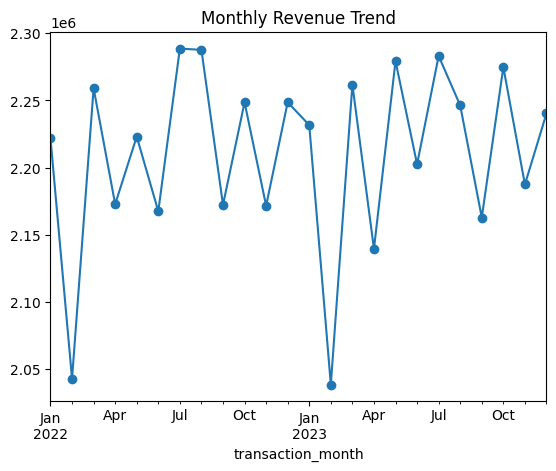

In [ ]:
## Trend Analysis
monthly_revenue = df.groupby('transaction_month')['total_value'].sum()
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')

## --> Overall revenue is seasonal

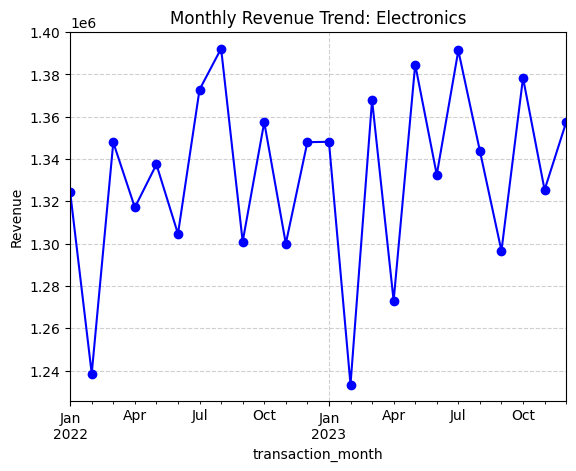

In [149]:
## Now, check trend analysis by product_category

monthly_electronics_trend = (
    df.query("product_category == 'Electronics'")
    .groupby('transaction_month')['total_value']
    .sum()
)

monthly_electronics_trend.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Trend: Electronics')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.6)


In [ ]:
# Now, check trend analysis by product_category by comparing each category numerically, comparing the % month by month

monthly_category_trends = (
    df.groupby(['transaction_month', 'product_category'])['total_value']
    .sum()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .unstack()
)

print(f"Monthly Revenue Share by Product Category:\n{monthly_category_trends.round(2)}")

In [156]:
# Calculate the variance, subtracting the previous month from the current month

monthly_variance = monthly_category_trends.diff()

print(f"Month-over-Month Variance (Percentage Points):\n{monthly_variance.round(2)}")


Month-over-Month Variance (Percentage Points):
product_category                     Beauty  Books  Clothing  Electronics  \
transaction_month transaction_month                                         
2022-01           2022-01               NaN    NaN       NaN          NaN   
2022-02           2022-02             -0.15  -0.17      0.10         1.03   
2022-03           2022-03              0.10   0.04     -0.28        -0.97   
2022-04           2022-04             -0.08   0.07      0.02         0.96   
2022-05           2022-05              0.30   0.06      0.21        -0.46   
2022-06           2022-06             -0.25  -0.08     -0.09         0.03   
2022-07           2022-07              0.02  -0.01      0.13        -0.21   
2022-08           2022-08             -0.04   0.01     -0.28         0.87   
2022-09           2022-09             -0.01   0.05      0.18        -0.96   
2022-10           2022-10              0.05  -0.03      0.13         0.48   
2022-11           2022-11    